<a href="https://colab.research.google.com/github/manishramamoorthy/Machine-Learning-Project/blob/main/1)_Students_Scores_Prediction_(Linear_Regression_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summary of Student Scores Prediction :**

Student Scores Prediction is **Supervised Learning**. The Vision of Student Scores Prediction is a Student **How Many Scores Get in Proper Time**.

# **Content of Student Scores Prediction :**

1) Importing Libraries       
2) Load a Dataset            
3) Data Preprocessing 

    -> 1) Top Five Rows of Dataset          
    -> 2) Last Five Rows of Dataset   
    -> 3) Shape of DataSet        
    -> 4) Data Types               
    -> 5) Information of Dataset       
    -> 6) Checking Missing Values      
    -> 7) Droping Duplicates Values of Dataset     
4) EDA(Exploratory Data Analysis)
       
    -> 1) Statistical Measures    
    -> 2) Data Visualization   
5) Train and Test Split      
6) Feature Scaling            
7) Build a Model     
8) Making Prediction       
9) Compare Actual and Predicted Values    
10) Evaluation Metrics          

# **Summary of Student Scores Prediction :**

Student Scores Prediction is **Supervised Learning**. The Vision of Student Scores Prediction is **a Student How Many Scores Get in Proper Time**.

# **1) Importing Libraries :**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# **2) Load a Dataset :**

In [2]:
data = pd.read_csv("/content/student_scores.csv")

# **3) Data Preprocessing :**

**1) Top Five Rows of Dataset**

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**2) Last Five Rows of Dataset**

In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


**3) Shape of Dataset**

In [5]:
data.shape
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 25
Number of Columns: 2


**4) Data Types**

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

**5) Information of Dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**6) Checking Missing Values of Dataset**

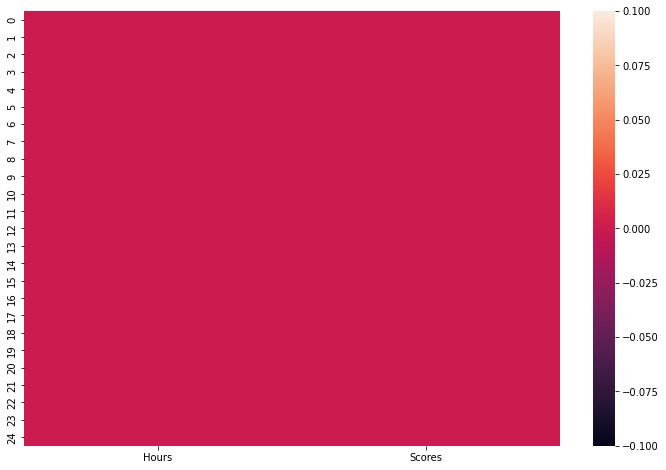

In [8]:
plt.figure(figsize = (12,8))
sns.heatmap(data.isnull())

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**7) Droping Duplicates Values of Dataset**

In [10]:
data = data.drop_duplicates()
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **4) EDA (Exploratory Data Analysis)**

**1) Statistical Measures**

In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**2) Data Visualization**

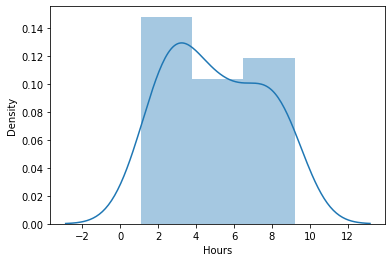

In [12]:
sns.distplot(data["Hours"])

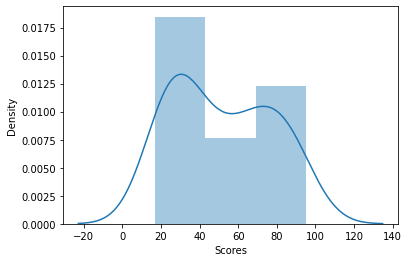

In [13]:
sns.distplot(data["Scores"])

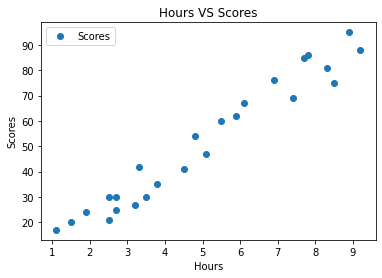

In [14]:
data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours VS Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [15]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


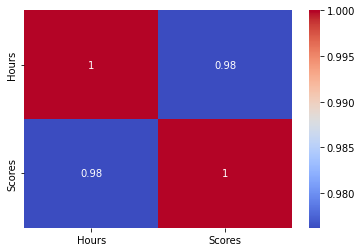

In [16]:
corr = data.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap="coolwarm")

# **5) Train and Test Split :**

In [17]:
X = data[["Hours"]]
y = data["Scores"]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# **6) Feature Scaling :**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.70098816],
       [-0.18459355],
       [-1.4954414 ],
       [ 1.00708632],
       [-1.01876945],
       [-1.01876945],
       [ 1.20569963],
       [-0.30376153]])

# **7) Build a Model :**

**Linear Regression :**

In [20]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

# **8) Making Prediction :**

# y = m*X + c

In [21]:
print(LR.intercept_) # c- Values
print(LR.coef_) # m- Values

3.6606226386250142
[9.58401581]


# 8 Hours Student Studies

In [22]:
LR.predict([[8]])

array([80.33274913])

# **9) Compare Actual Values and Predicted Values :**

In [23]:
y_pred = LR.predict(X_test)
y_pred

array([37.20467798, 49.66389853, 18.03664636, 78.41594597, 29.53746533,
       29.53746533, 83.20795388, 46.78869379])

In [24]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
4,30,37.204678
21,54,49.663899
5,20,18.036646
24,86,78.415946
9,25,29.537465
20,30,29.537465
8,81,83.207954
12,41,46.788694


# **10) Evaluation Matrics :**

In [25]:
from sklearn import metrics
print("R2-Score: ",metrics.r2_score(y_test,y_pred))

R2-Score:  0.9578970674212237
